
Project Description

Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.


People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


Analytical Task

To determine factors that can predict more cases of heart diseases.

The major determinant of heart diseases.


Data Description

---


Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]






Approximate sequence of the data

STEP 1:Download the data

Data loading and preliminary analysis

Step 2:Data Preparation

Search for duplicates,anomalies and missing values

Adding of new columns

Step 3:Exploratory Data Analysis

Identify patterns and relationships between variables using different graphs

Step 4 :Statistical Hypothesis

Formulate and test hypotheses about the different causes of heart diseases.






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
data=pd.read_csv('heart.csv')

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
del data['ST_Slope']

In [ ]:
data=data.reset_index(drop=True)

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,0


In [ ]:
data['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

<Axes: ylabel='count'>

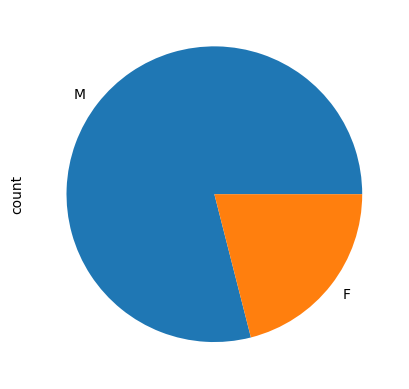

In [ ]:
data['Sex'].value_counts().plot.pie()

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: ylabel='count'>

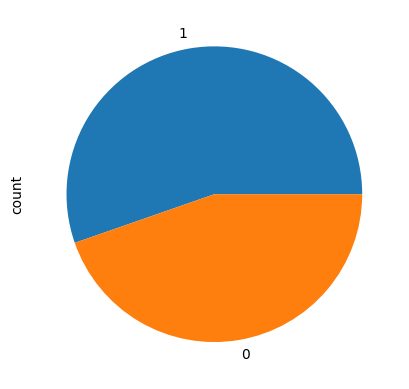

In [ ]:
data['HeartDisease'].value_counts().plot.pie()

<Axes: xlabel='Sex', ylabel='HeartDisease'>

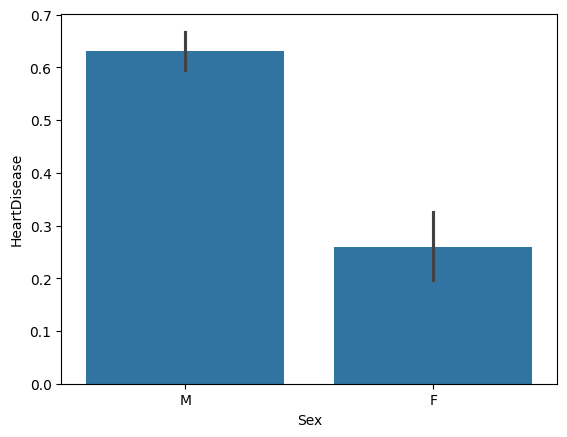

In [ ]:
sns.barplot(data=data,x='Sex',y='HeartDisease')

<Axes: xlabel='Sex', ylabel='Count'>

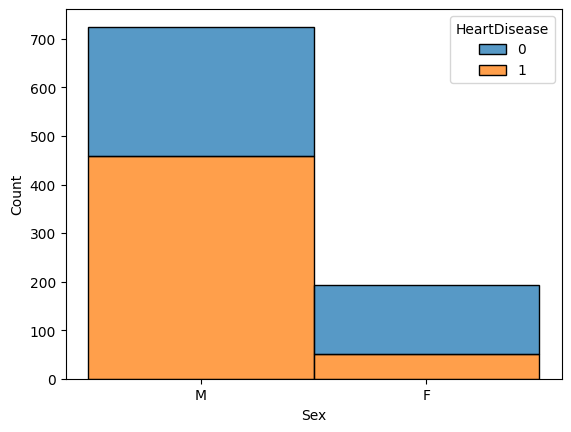

In [ ]:
sns.histplot(data,x='Sex',hue='HeartDisease',bins = 50,multiple='stack')

Generally Males have a high rate of heart disease compared to females

<Axes: xlabel='Age', ylabel='HeartDisease'>

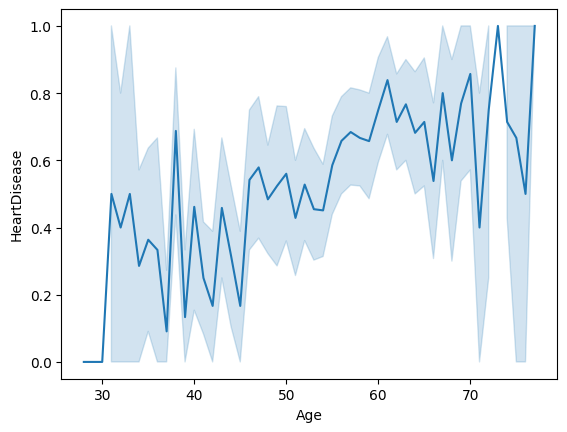

In [ ]:
sns.lineplot(data=data,x='Age',y='HeartDisease')

Heart Disease increases with age and mostly from the age of 50 to 70 years


<Axes: xlabel='Age', ylabel='Cholesterol'>

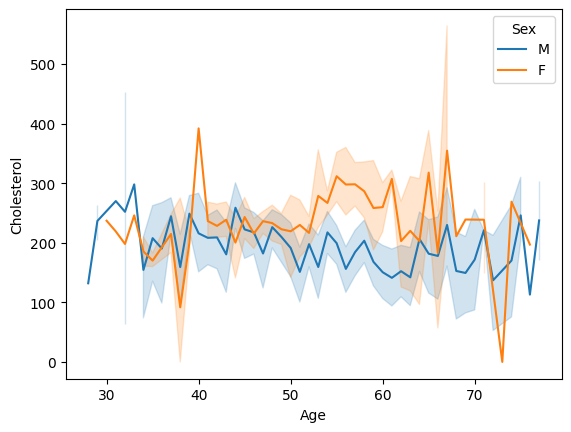

In [ ]:
sns.lineplot(data=data,x='Age',y='Cholesterol',hue='Sex')

Level of Cholesterol in males increases between the age of 30-35 however the years after cholesterol level is steady

Level of Cholesterol increases more in females from the age of 35-70 years


<Axes: xlabel='Age', ylabel='RestingBP'>

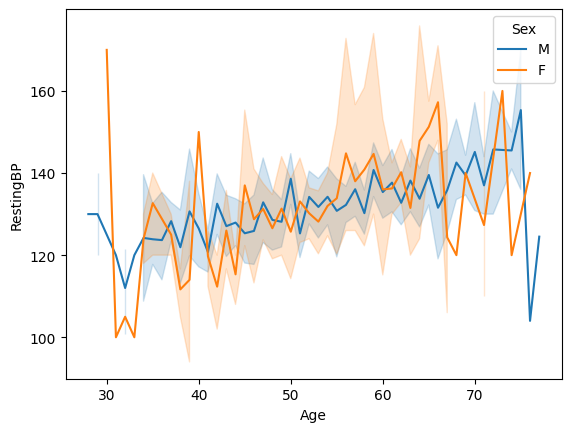

In [ ]:
sns.lineplot(data=data,x='Age',y='RestingBP',hue='Sex')

Resting BP increases with age for both females and males.

Resting BP increaeses more in females than in males


In [ ]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
HeartDisease        int64
dtype: object

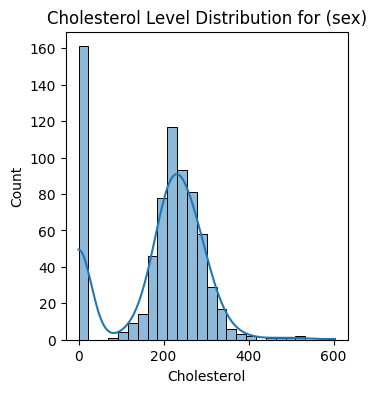

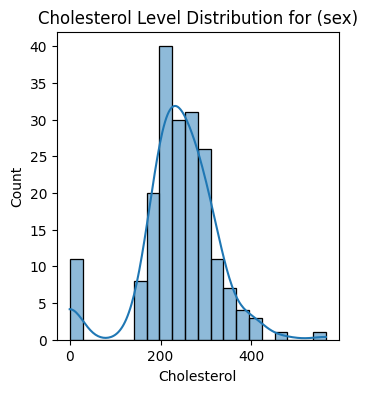

In [ ]:
for sex in data['Sex'].unique():
    plt.figure(figsize= (8,4))
    plt.subplot(1,2,1)
    sns.histplot(data[data['Sex']==sex]['Cholesterol'],kde=True)
    plt.title(f'Cholesterol Level Distribution for (sex)')

In [ ]:
statistic,p_value=stats.normaltest(data['Cholesterol'])
print(statistic,p_value)
alpha=0.05
if p_value>alpha:
    print('We do not reject hypothesis for normal distribution')
else:
    print('We reject hypothesis for normal distribution')

50.09695629245791 1.3230740789245988e-11
We reject hypothesis for normal distribution


In [ ]:
statistic,p_value=stats.normaltest(data['Age'])
print(statistic,p_value)
alpha=0.05
if p_value>alpha:
    print('We do not reject hypothesis for normal distribution')
else:
    print('We reject hypothesis for normal distribution')

14.387278957845862 0.0007513496172395723
We reject hypothesis for normal distribution


In [ ]:
statistic,p_value=stats.normaltest(data['RestingBP'])
print(statistic,p_value)
alpha=0.05
if p_value>alpha:
    print('We do not reject hypothesis for normal distribution')
else:
    print('We reject hypothesis for normal distribution')

80.15332964094773 3.934826751861588e-18
We reject hypothesis for normal distribution


In [ ]:
corr_matrix=data.corr(numeric_only=True)

<Axes: >

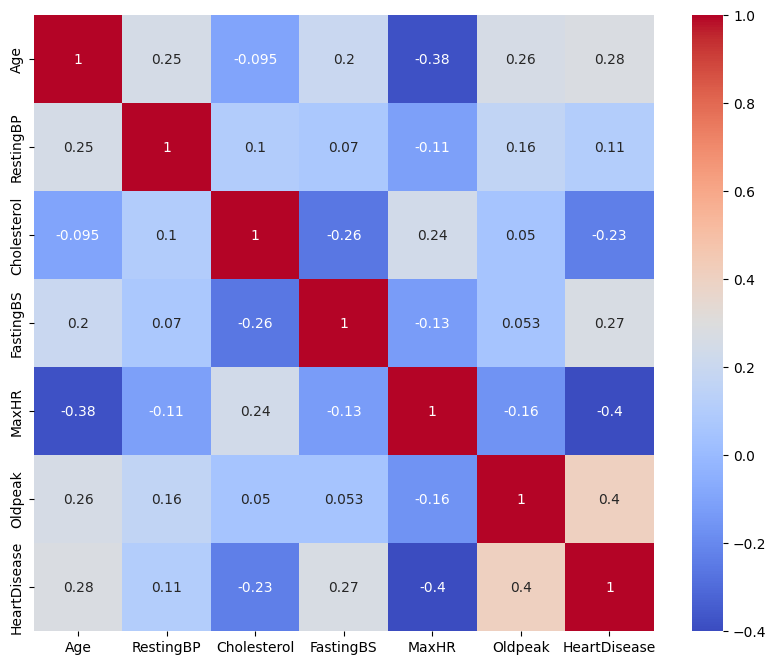

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

Heart Disease is positively correlated to Old Peak,FastingsBS,RestingBP and Age.

MaxHR and Cholesterole level is negatively correlated to Heart Disease.